In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Questão 01

In [84]:
x = np.arange(-10, 10, 0.001)

pc0 = np.array([0.25 if np.abs(i) < 2 else 0 for i in x]) # p(x|C-1)
pc1 = np.exp((-(x-2)**2)/2)/np.sqrt((2*np.pi)) # p(x|C+1)
evidence = 0.4*pc0 + 0.6*pc1 # p(x)

g0 = 0.4*pc0 # g-1(x)
g1 = 0.6*pc1 # g+1(x)

posteriorC0 = 0.4*pc0/evidence # p(C-1|x)
posteriorC1 = 0.6*pc1/evidence # p(C+1|x)

likelihoodC0 = pc0
likelihoodC1 = pc1

g_map = 0.4*pc0 - 0.6*pc1 # g(x) - max posteriori
g_mec = pc0 - pc1 # g(x) - max likelihood

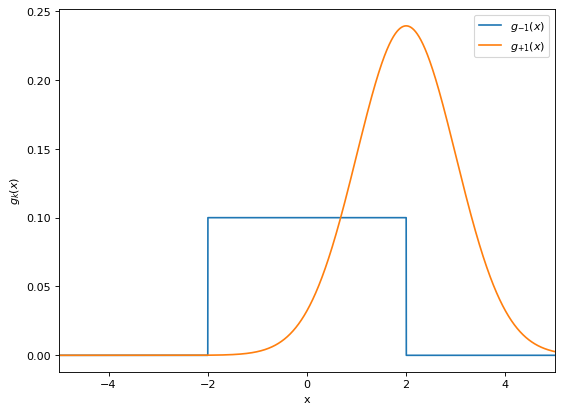

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
fig.set_dpi(80)

plt.plot(x, g0, label='$g_{-1}(x)$')
plt.plot(x, g1, label='$g_{+1}(x)$')
plt.xlabel('x')
plt.ylabel('$g_{k}(x)$')
# plt.ylim(-0.1, 0.4)
plt.xlim(-5, 5)
plt.legend()

plt.savefig('images/plotq1a')
plt.show()

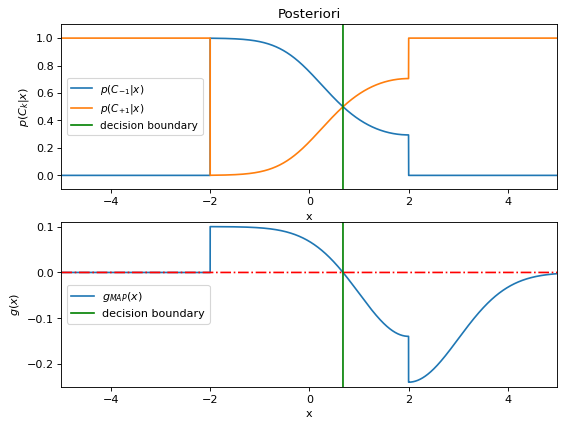

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
fig.set_dpi(80)

plt.subplot(2,1,1)
plt.plot(x, posteriorC0, label='$p(C_{-1}|x)$')
plt.plot(x, posteriorC1, label='$p(C_{+1}|x)$')
plt.plot([x[posteriorC0 > posteriorC1][-1] for _ in x], x, label = 'decision boundary', color = 'g')
plt.xlabel('x')
plt.ylabel('$p(C_{k}|x)$')
plt.ylim(-0.1, 1.1)
plt.xlim(-5, 5)
plt.title('Posteriori')
plt.legend(loc = 'center left', prop={'size': 9.5})

plt.subplot(2, 1, 2)
plt.plot(x, g_map, label = '$g_{MAP}(x)$')
plt.plot([x[posteriorC0 > posteriorC1][-1] for _ in x], x, label = 'decision boundary', color = 'g')
plt.plot(x, [0 for _ in x], linestyle = '-.', color = 'r')
plt.ylim(np.min(g_map) - 0.01, np.max(g_map) + 0.01)
plt.xlabel('x')
plt.ylabel('$g(x)$')
plt.xlim(-5, 5)
plt.legend(loc = 'center left')

plt.savefig('images/plotq1b')
plt.show()

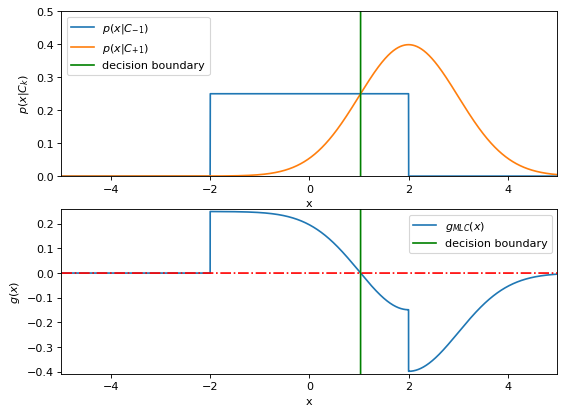

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
fig.set_dpi(80)

plt.subplot(2,1,1)
plt.plot(x, likelihoodC0, label='$p(x|C_{-1})$')
plt.plot(x, likelihoodC1, label='$p(x|C_{+1})$')
plt.plot([x[likelihoodC0 > likelihoodC1][-1] for _ in x], x, label = 'decision boundary', color = 'g')
plt.xlim(-5, 5)
plt.ylim(0, 0.5)
plt.xlabel('x')
plt.ylabel('$p(x|C_{k})$')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(x, g_mec, label = '$g_{MLC}(x)$')
plt.plot([x[likelihoodC0 > likelihoodC1][-1] for _ in x], x, label = 'decision boundary', color = 'g')
plt.plot(x, [0 for _ in x], linestyle = '-.', color = 'r')
plt.ylim(np.min(g_mec) - 0.01, np.max(g_mec) + 0.01)
plt.xlim(-5, 5)
plt.xlabel('x')
plt.ylabel('$g(x)$')
# plt.fill_between(x, np.min(g), g, where= (x <= x[np.argmin(np.abs(g))]), alpha = 0.3, color = 'C0', label = 'Class $C_{-1}$')
# plt.fill_between(x, np.min(g), g, where= (x > x[np.argmin(np.abs(g))]), alpha = 0.3, color = 'C1', label = 'Class $C_{+1}$')
plt.legend()

plt.savefig('images/plotq1c')
plt.show()

Questão 02

In [11]:
data = pd.read_csv('data/dados.csv', header = None, names = ['x1', 'x2', 'C'])

x1_C0 = data.loc[data['C'] == -1, 'x1']
x2_C0 = data.loc[data['C'] == -1, 'x2']

x1_C1 = data.loc[data['C'] == 1, 'x1']
x2_C1 = data.loc[data['C'] == 1, 'x2']

mean_C0 = np.array([x1_C0.mean(), x2_C0.mean()])
mean_C1 = np.array([x1_C1.mean(), x2_C1.mean()])

sigma_C0 = np.cov(x1_C0, x2_C0)
sigma_C1 = np.cov(x1_C1, x2_C1)

In [17]:
X = np.array(data[['x1', 'x2']]).T

In [18]:
muc0 = np.array([0.5, 2.5])
muc1 = np.array([6, -4])

SigmaC0 = np.array([[9, 2.4], [2.4, 4]])
SigmaC1 = np.array([[1, 1], [1, 4]])

In [19]:
C = np.array([1 if x == 1 else 0 for x in data['C']])

In [21]:
def predict(X, mean_C0, mean_C1, sigma_C0, sigma_C1):

    c0_inv = np.linalg.inv(sigma_C0)
    c1_inv = np.linalg.inv(sigma_C1)

    c0_det = np.linalg.det(sigma_C0)
    c1_det = np.linalg.det(sigma_C1)

    likelihoodC0 = np.zeros(X.shape[1])
    likelihoodC1 = np.zeros(X.shape[1])

    evidence = np.zeros(X.shape[1])

    posteriorC0 = np.zeros(X.shape[1])
    posteriorC1 = np.zeros(X.shape[1])

    pred_class = np.zeros(X.shape[1])
    priorC0 = 0.3
    priorC1 = 0.7

    for i in range(X.shape[1]):

        likelihoodC0[i] = (1/(np.sqrt(2*np.pi*c0_det)))*np.exp((-1/2)*np.dot(np.dot((X[:, i] - mean_C0).T, c0_inv), (X[:, i] - mean_C0)))
        likelihoodC1[i] = (1/(np.sqrt(2*np.pi*c1_det)))*np.exp((-1/2)*np.dot(np.dot((X[:, i] - mean_C1).T, c1_inv), (X[:, i] - mean_C1)))

        evidence = likelihoodC0[i]*priorC0 + likelihoodC1[i]*priorC1

        posteriorC0[i] = likelihoodC0[i]*priorC0/evidence
        posteriorC1[i] = likelihoodC1[i]*priorC1/evidence

        pred_class[i] = np.argmax([posteriorC0[i], posteriorC1[i]])

    return pred_class

In [22]:
data['prediction'] = predict(X, mean_C0, mean_C1, sigma_C0, sigma_C1)
data.loc[data['prediction'] == 0, 'prediction'] = -1
data['prediction'] = data['prediction'].astype(int)
data['error'] = data['prediction'] != data['C']
error_rate = data['error'].sum()/data.shape[0]
print(error_rate)

0.007333333333333333


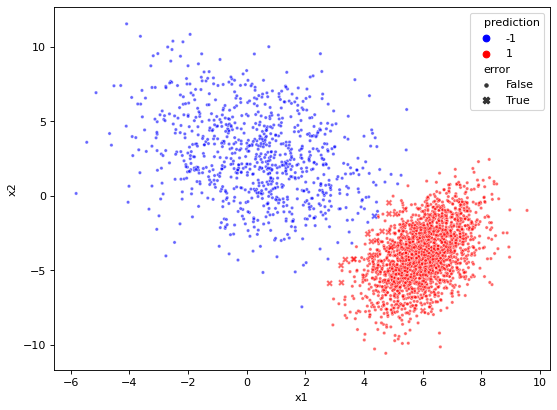

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
fig.set_dpi(80)
sns.scatterplot(x = data['x1'], y = data['x2'], alpha = 0.6, hue = data['prediction'], style = data['error'], palette = 'bwr', markers = ['.', 'X'])
plt.savefig('images/plotq2a')
plt.show()

In [24]:
def set_coordinates(d):

    x1 = np.linspace(-d, d, 1000)
    x2 = np.linspace(-d, d, 1000)
    X1, X2 = np.meshgrid(x1, x2)

    pos = np.empty(X1.shape + (2,))
    pos[:, :, 0] = X1
    pos[:, :, 1] = X2

    return X1, X2, pos

In [25]:
def exp2d(x, u, s):

    n = u.shape[0]
    sigma_det = np.linalg.det(s)
    sigma_inv = np.linalg.inv(s)
    N = np.sqrt((2*np.pi)**n * sigma_det)

    k = np.einsum('...k,kl,...l->...', x-u, sigma_inv, x-u)
    return np.exp(-k/2)/N

In [26]:
X1, X2, pos = set_coordinates(15)

ZC0 = 0.3*exp2d(pos, mean_C0, sigma_C0)
ZC1 = 0.7*exp2d(pos, mean_C1, sigma_C1)
Z_boundary = ZC0 - ZC1

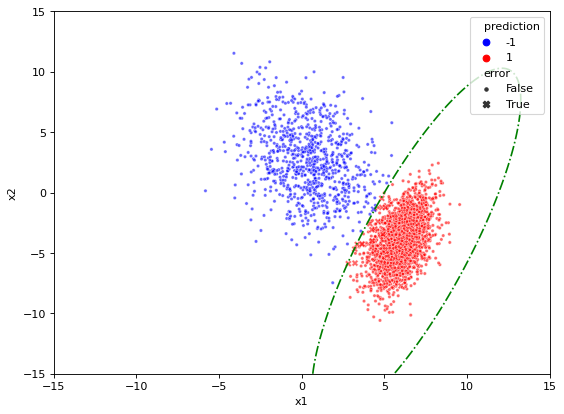

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
fig.set_dpi(80)
ax.contour(X1, X2, Z_boundary, levels = 0, colors = 'g', linestyles = '-.')
sns.scatterplot(x = data['x1'], y = data['x2'], alpha = 0.6, hue = data['prediction'], style = data['error'], palette = 'bwr', markers = ['.', 'X'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.savefig('images/plotq2b')
plt.show()

Questão 03

In [31]:
import seaborn as sns

In [33]:
houses = pd.read_csv('data/train.csv')[['LotArea', 'SalePrice']]

In [35]:
train_data = houses.sample(frac = 0.6, random_state = 0)

test_validation = houses.drop(train_data.index)

validation_data = test_validation.sample(frac = 0.5, random_state = 0)

test_data = houses.drop(validation_data.index.union(train_data.index))

In [36]:
X_train, y_train = train_data['LotArea'], train_data['SalePrice']
X_val, y_val = validation_data['LotArea'], validation_data['SalePrice']
X_test, y_test = test_data['LotArea'], test_data['SalePrice']

In [37]:
def calc_weights(D, y):

    w = np.dot(np.dot(np.linalg.inv(np.dot(D.T, D)), D.T), y)

    return w

In [38]:
def degree_map(X, degree):

    D = np.zeros([X.shape[0], degree + 1])

    for i in range(degree + 1):
        D[:, i] = X**i
    
    return D

In [39]:
def mean_square_error(y_pred, y):

    return np.sum((y_pred - y)**2)/len(y)

In [40]:
def normalize(train, val, test):
    mu = np.mean(train)
    sigma = np.std(train)

    train_norm = (train - mu)/sigma
    val_norm = (val - mu)/sigma
    test_norm = (test - mu)/sigma

    return train_norm, val_norm, test_norm

In [41]:
X_train, X_val, X_test = normalize(X_train, X_val, X_test)
y_train, y_val, y_test = normalize(y_train, y_val, y_test)

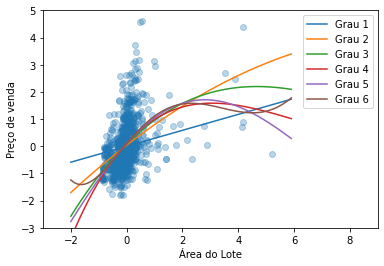

In [70]:
val_error = []
train_error = []
X_plot = np.arange(-2, 6, 0.1)

max_degree = 6
for degree in range(1, max_degree + 1):

    X_train_map = degree_map(X_train, degree)
    X_val_map = degree_map(X_val, degree)
    w = calc_weights(X_train_map, y_train)

    y_predTrain = np.dot(X_train_map, w)
    y_predVal = np.dot(X_val_map, w)

    val_error.append(mean_square_error(y_predVal, y_val))
    train_error.append(mean_square_error(y_predTrain, y_train))

    plt.plot(X_plot, np.dot(degree_map(X_plot, degree), w), label = f'Grau {degree}')

plt.scatter(X_train, y_train, alpha = 0.3)
plt.xlabel('Área do Lote')
plt.ylabel('Preço de venda')
plt.xlim([-3, 9])
plt.ylim([-3, 5])
plt.legend()

plt.savefig('images/plotq3a')
plt.show()

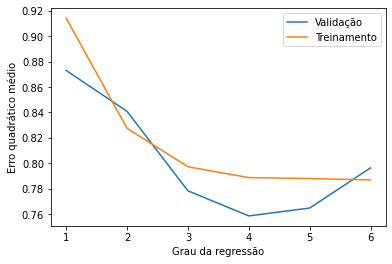

In [73]:
plt.plot([d for d in range(1, degree+1)], val_error, label = 'Validação')
plt.plot([d for d in range(1, degree+1)], train_error, label = 'Treinamento')
plt.xlabel('Grau da regressão')
plt.ylabel('Erro quadrático médio')

plt.legend()
plt.savefig('images/plotq3c')

In [82]:
X_train_map = degree_map(X_train, 4)
X_test_map = degree_map(X_test, 4)
w = calc_weights(X_train_map, y_train)

y_predTest= np.dot(X_test_map, w)

In [83]:
mean_square_error(y_predTest, y_test)

0.8110976273692136